---

**Load essential libraries**

---

In [1]:
import pandas as pd
import numpy as np
import sys
from scipy import linalg

import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_blobs

from scipy.sparse import random
from scipy import stats

C:\Users\adity\AppData\Local\Temp\ipykernel_26248\1409834152.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


---

**The following code cell mounts the Google Drive folder for accessing data etc.**

---

In [ ]:
# ## Mount Google drive folder if running in Colab
# if('google.colab' in sys.modules):
#     from google.colab import drive
#     drive.mount('/content/drive', force_remount = True)
#     # Change path below starting from /content/drive/MyDrive/Colab Notebooks/
#     # depending on how data is organized inside your Colab Notebooks folder in
#     # Google Drive
#     DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/Workshops/Applied Machine Learning Workshop Canara Engineering College_August2023'
#     DATA_DIR = DIR+'/Data/'
# else:
#     DATA_DIR = 'Data/'

In [2]:
DATA_DIR='Data/'


**Data Matrix**

Patient dataset corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

In [3]:
## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

print(df_patient)
#df_patient.shape
#df_patient.head()
print('----------')
A = np.array(df_patient)
print(A)

   HR   BP  Temp
0  76  126  38.0
1  74  120  38.0
2  72  118  37.5
3  78  136  37.0
----------
[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]



---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$a{\color{cyan}\cdot}b = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.

---

In [4]:
# Unit vectors
e_1 = np.array([1, 0, 0, 0])
e_3 = np.array([0, 0, 1, 0])

# Ones vector
o = np.array([1, 1, 1, 1])

# Vector for 1st feature (heart rate)
a_1 = A[:, 0]

# Get 1st component of vector (heart rate for 1st patient)
print(a_1[0])
print(np.dot(a_1, e_1))
print(np.dot(e_1, a_1))

# Get 3rd component of vector (heart rate for 3rd patient)
print(np.dot(a_1, e_3))

# Get sum of 1st feature values (heart rate) for all patients
print(np.sum(a_1))
print(np.dot(a_1, o))

# Average of 1st feature values (heart rate)
print((1/len(a_1)) * np.dot(a_1, o))
print(np.mean(a_1))

76.0
76.0
76.0
72.0
300.0
300.0
75.0
75.0


---

**Cauchy-Schwarz inequality**

For any two $n$-vectors $a,b,$ it is always true that $$-1\leq\frac{a\cdot b}{\lVert a\rVert\lVert b\rVert}\leq 1.$$

This is used to define the cosine of the angle between the vectors $a$ and $b$ as follows:$$\cos(\angle(a,b)) = \frac{a\cdot b}{\lVert a\rVert\lVert b\rVert}.$$

---

In [5]:
## Simulate a patient dataset
#np.random.seed(100)
nsamples = 100
df = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples)),
                   'Blood Pressure (mm Hg)' : np.round(np.random.normal(126, 8, nsamples))})
print(df)

    Heart Rate (BPM)  Blood Pressure (mm Hg)
0               74.0                   131.0
1               70.0                   124.0
2               73.0                   131.0
3               72.0                   121.0
4               76.0                   129.0
..               ...                     ...
95              74.0                   128.0
96              74.0                   132.0
97              77.0                   107.0
98              77.0                   127.0
99              77.0                   117.0

[100 rows x 2 columns]


920033.0
0.9966015522347538
-313.3299999999999
-0.11368018277043704


(0.0, 143.0)

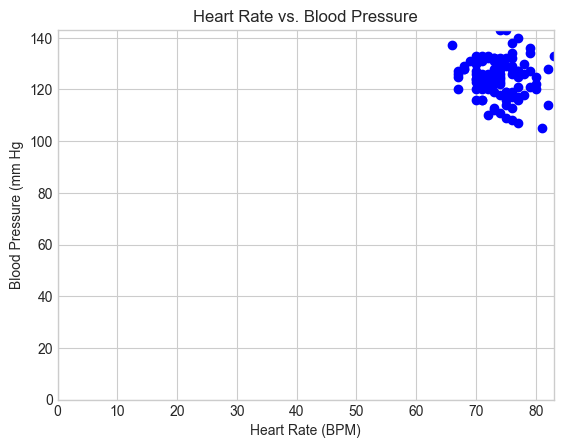

In [6]:
# Vector of heart rate and blood pressure
a = df['Heart Rate (BPM)']
b = df['Blood Pressure (mm Hg)']
print(np.dot(a, b)) # Dot-product between the original vectors do not reveal much
print(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))) # Recall angle(a,b) acos(aT*b/(||a||*||b||))

# Mean-centered heart rate and blood pressure vectors
a_mc = a - np.mean(a)
b_mc = b - np.mean(b)
print(np.dot(a_mc, b_mc)) # Covariance between a and b
print(np.dot(a_mc, b_mc) / (np.linalg.norm(a_mc) * np.linalg.norm(b_mc))) # Correlation coefficient

fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
ax.set_xlim([0, np.max(a)])
ax.set_ylim([0, np.max(b)])

**Projection of vectors and its relationship to dot product**

![Vector projection](https://bl3302files.storage.live.com/y4miuCtKP9ptv6lIB8EqEU_u7cbEydy0UsEgHl4ECni2UVONtvKZgf73pIQ4vuA99ZHP8K96W_1i-QuhSIN12IudLaUTF3_jZzFqVfsaRK7QubMS9p5C1ErN6tB8I_UqQZnSY2JSGnu0IvJQrRcd2rX2Hzngfka3tCqJhbAMdElywcis2gRaoiuEGDVqaXpZYYp?width=256&height=209&cropmode=none)

In [ ]:
np.mean((a-np.mean(a))**2)

In [ ]:
np.sqrt(np.mean((a-np.mean(a))**2))

In [ ]:
print(np.dot(A[0, :], v) / np.linalg.norm(v))
print(np.dot(A[1, :], v) / np.linalg.norm(v))
print(np.dot(A[2, :], v) / np.linalg.norm(v))
print(np.dot(A[3, :], v) / np.linalg.norm(v))

In [ ]:
np.dot(A, v)/np.linalg.norm(v)

In [ ]:
## Scalar projection of first patient onto a direction v
v = np.array([1, 0, 0])
print(np.dot(A[0], v) / np.linalg.norm(v))
v = np.array([0, 1, 0])
print(np.dot(A[0], v) / np.linalg.norm(v))
v = np.array([1, 1, 1])
print(np.dot(A[0], v) / np.linalg.norm(v))
v = np.array([-1, -1, -1])
print(np.dot(A[0], v) / np.linalg.norm(v))

In [ ]:
## Scalar projection of all patients onto a direction v
v = np.array([1, 0, 0])
print((1/np.linalg.norm(v)) * np.dot(A, v))
v = np.array([0, 1, 0])
print((1/np.linalg.norm(v)) * np.dot(A, v))
v = np.array([1, 1, 1])
print((1/np.linalg.norm(v)) * np.dot(A, v))
v = np.array([-1, -1, -1])
print((1/np.linalg.norm(v)) * np.dot(A, v))

---

Load food-texture data

---

In [7]:
## Load data
FILE = DATA_DIR + 'food-texture.csv'
df_food = pd.read_csv(FILE, index_col = 0)
df_food.head()

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


In [8]:
## Print the names of the rows & columns in the dataframe
print(df_food.index)
print(df_food.columns)

Index(['B110', 'B136', 'B171', 'B192', 'B225', 'B237', 'B261', 'B264', 'B353',
       'B360', 'B366', 'B377', 'B391', 'B397', 'B404', 'B437', 'B445', 'B462',
       'B485', 'B488', 'B502', 'B554', 'B556', 'B575', 'B576', 'B605', 'B612',
       'B615', 'B649', 'B665', 'B674', 'B692', 'B694', 'B719', 'B727', 'B758',
       'B776', 'B799', 'B836', 'B848', 'B861', 'B869', 'B876', 'B882', 'B889',
       'B907', 'B911', 'B923', 'B971', 'B998'],
      dtype='object')
Index(['Oil', 'Density', 'Crispy', 'Fracture', 'Hardness'], dtype='object')


In [9]:
## Get values in the 'Density' column
print(df_food['Density'])

B110    2955
B136    2660
B171    2870
B192    2920
B225    2975
B237    2790
B261    2750
B264    2770
B353    2955
B360    2945
B366    2830
B377    2835
B391    2860
B397    2965
B404    2930
B437    2770
B445    2650
B462    2890
B485    2695
B488    2755
B502    3000
B554    2980
B556    2780
B575    2705
B576    2825
B605    2875
B612    2945
B615    2920
B649    2845
B665    2645
B674    3080
B692    2825
B694    3125
B719    2780
B727    2900
B758    2570
B776    2635
B799    2725
B836    2865
B848    2975
B861    2980
B869    2870
B876    2920
B882    3100
B889    2910
B907    2865
B911    2995
B923    2925
B971    2700
B998    2845
Name: Density, dtype: int64


In [10]:
## Get features for the sample B136
print(df_food.loc['B136', :])

Oil           17.7
Density     2660.0
Crispy        14.0
Fracture       9.0
Hardness     139.0
Name: B136, dtype: float64


In [11]:
## Get 'Oil' and 'Density' values for the
## samples B136 and B225
feature_names = ['Oil', 'Density']
sample_names = ['B136', 'B225']
df_food.loc[sample_names, feature_names]

,Oil,Density
B136,17.7,2660
B225,16.3,2975


In [ ]:
df_food.dtypes

In [12]:
## Create a list of continuous and categorical column names
continuous_cols = ['Oil', 'Density', 'Fracture', 'Hardness']
categorical_cols = ['Crispy']

# Typecasting
df_food[categorical_cols] = df_food[categorical_cols].astype('category')
df_food[continuous_cols] = df_food[continuous_cols].astype('float64')

In [13]:
## Print dataframe column types
df_food.dtypes

Oil          float64
Density      float64
Crispy      category
Fracture     float64
Hardness     float64
dtype: object

---

Principal component analysis (PCA) of the dataset

---

In [14]:
np.array(df_food[continuous_cols])

array([[  16.5, 2955. ,   23. ,   97. ],
       [  17.7, 2660. ,    9. ,  139. ],
       [  16.2, 2870. ,   17. ,  143. ],
       [  16.7, 2920. ,   31. ,   95. ],
       [  16.3, 2975. ,   26. ,  143. ],
       [  19.1, 2790. ,   16. ,  189. ],
       [  18.4, 2750. ,   17. ,  114. ],
       [  17.5, 2770. ,   26. ,   63. ],
       [  15.7, 2955. ,   23. ,  123. ],
       [  16.4, 2945. ,   24. ,  132. ],
       [  18. , 2830. ,   15. ,  121. ],
       [  17.4, 2835. ,   18. ,  172. ],
       [  18.4, 2860. ,   11. ,  170. ],
       [  13.9, 2965. ,   19. ,  169. ],
       [  15.8, 2930. ,   26. ,   65. ],
       [  16.4, 2770. ,   16. ,  183. ],
       [  18.9, 2650. ,   20. ,  114. ],
       [  17.3, 2890. ,   17. ,  142. ],
       [  16.7, 2695. ,   13. ,  111. ],
       [  19.1, 2755. ,   10. ,  140. ],
       [  13.7, 3000. ,   27. ,  177. ],
       [  14.7, 2980. ,   20. ,  133. ],
       [  18.1, 2780. ,   14. ,  150. ],
       [  17.2, 2705. ,   27. ,  113. ],
       [  18.7, 

In [15]:
X = np.array(df_food[continuous_cols])
X

array([[  16.5, 2955. ,   23. ,   97. ],
       [  17.7, 2660. ,    9. ,  139. ],
       [  16.2, 2870. ,   17. ,  143. ],
       [  16.7, 2920. ,   31. ,   95. ],
       [  16.3, 2975. ,   26. ,  143. ],
       [  19.1, 2790. ,   16. ,  189. ],
       [  18.4, 2750. ,   17. ,  114. ],
       [  17.5, 2770. ,   26. ,   63. ],
       [  15.7, 2955. ,   23. ,  123. ],
       [  16.4, 2945. ,   24. ,  132. ],
       [  18. , 2830. ,   15. ,  121. ],
       [  17.4, 2835. ,   18. ,  172. ],
       [  18.4, 2860. ,   11. ,  170. ],
       [  13.9, 2965. ,   19. ,  169. ],
       [  15.8, 2930. ,   26. ,   65. ],
       [  16.4, 2770. ,   16. ,  183. ],
       [  18.9, 2650. ,   20. ,  114. ],
       [  17.3, 2890. ,   17. ,  142. ],
       [  16.7, 2695. ,   13. ,  111. ],
       [  19.1, 2755. ,   10. ,  140. ],
       [  13.7, 3000. ,   27. ,  177. ],
       [  14.7, 2980. ,   20. ,  133. ],
       [  18.1, 2780. ,   14. ,  150. ],
       [  17.2, 2705. ,   27. ,  113. ],
       [  18.7, 

In [16]:
# numpy array of data
X = np.array(df_food[continuous_cols])
# Cree and fit PCA object
pca = PCA(n_components = 1)
pca.fit(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[ 0.00958687 -0.99923202 -0.0249962  -0.02861215]]
[15523.38854181]


In [17]:
df_food[continuous_cols].columns

Index(['Oil', 'Density', 'Fracture', 'Hardness'], dtype='object')

In [18]:
df_food['Density']

B110    2955.0
B136    2660.0
B171    2870.0
B192    2920.0
B225    2975.0
B237    2790.0
B261    2750.0
B264    2770.0
B353    2955.0
B360    2945.0
B366    2830.0
B377    2835.0
B391    2860.0
B397    2965.0
B404    2930.0
B437    2770.0
B445    2650.0
B462    2890.0
B485    2695.0
B488    2755.0
B502    3000.0
B554    2980.0
B556    2780.0
B575    2705.0
B576    2825.0
B605    2875.0
B612    2945.0
B615    2920.0
B649    2845.0
B665    2645.0
B674    3080.0
B692    2825.0
B694    3125.0
B719    2780.0
B727    2900.0
B758    2570.0
B776    2635.0
B799    2725.0
B836    2865.0
B848    2975.0
B861    2980.0
B869    2870.0
B876    2920.0
B882    3100.0
B889    2910.0
B907    2865.0
B911    2995.0
B923    2925.0
B971    2700.0
B998    2845.0
Name: Density, dtype: float64

In [19]:
sc = StandardScaler()
X = sc.fit_transform(np.array(df_food[continuous_cols]))
print(X)

[[-4.45429679e-01  7.90272081e-01  3.95480679e-01 -1.01185374e+00]
 [ 3.15988576e-01 -1.60326246e+00 -2.19177610e+00  3.51130771e-01]
 [-6.35784242e-01  1.00609587e-01 -7.13343654e-01  4.80938820e-01]
 [-3.18526636e-01  5.06293407e-01  1.87391312e+00 -1.07675776e+00]
 [-5.72332721e-01  9.52545608e-01  9.49892845e-01  4.80938820e-01]
 [ 1.20430987e+00 -5.48484524e-01 -8.98147709e-01  1.97373138e+00]
 [ 7.60149224e-01 -8.73031580e-01 -7.13343654e-01 -4.60169532e-01]
 [ 1.89085533e-01 -7.10758052e-01  9.49892845e-01 -2.11522215e+00]
 [-9.53041848e-01  7.90272081e-01  3.95480679e-01 -1.68101423e-01]
 [-5.08881200e-01  7.09135317e-01  5.80284734e-01  1.23966686e-01]
 [ 5.06343139e-01 -2.23937468e-01 -1.08295176e+00 -2.33005447e-01]
 [ 1.25634012e-01 -1.83369086e-01 -5.28539599e-01  1.42204717e+00]
 [ 7.60149224e-01  1.94728233e-02 -1.82216799e+00  1.35714315e+00]
 [-2.09516923e+00  8.71408844e-01 -3.43735543e-01  1.32469114e+00]
 [-8.89590327e-01  5.87430171e-01  9.49892845e-01 -2.05031813e

In [20]:
a = np.array(df_food['Density'])
print(np.mean(a))
print(np.std(a))
np.where((a-np.mean(a))/np.std(a) >= 1.5)

2857.6
123.24869167662592


(array([30, 32, 43], dtype=int64),)

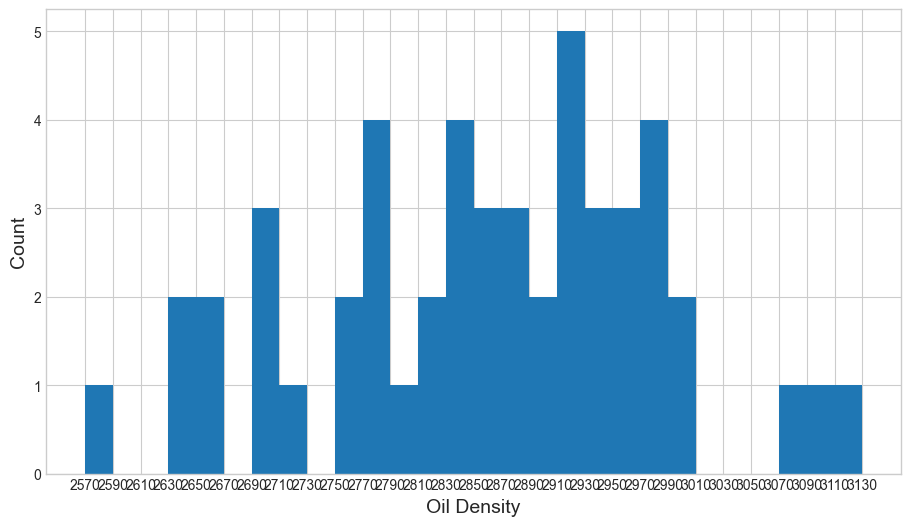

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.tight_layout(pad = 4.0)
binwidth = 20
ax.hist(a, bins = np.arange(np.min(a), np.max(a) + binwidth, binwidth))
ax.set_xlabel('Oil Density', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xticks(np.arange(np.min(a), np.max(a) + binwidth, binwidth));

In [23]:
# numpy array of data
sc = StandardScaler()
X = sc.fit_transform(np.array(df_food[continuous_cols]))
# Cree and fit PCA object
pca = PCA(n_components = 1)
pca.fit(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[ 0.58633268 -0.59639892 -0.54419604  0.06612857]]
[2.29331669]


In [25]:
v = pca.components_.flatten()
print(v)
print(np.linalg.norm(v))
X_projected = np.dot(X, v)/ np.linalg.norm(v)
print((X_projected))

[[-1.01461885]
 [ 2.35743408]
 [-0.01278194]
 [-1.57969597]
 [-1.38879868]
 [ 1.65253027]
 [ 1.32414386]
 [-0.12204218]
 [-1.25645232]
 [-1.02889213]
 [ 1.00437134]
 [ 0.56469155]
 [ 1.51544929]
 [-1.47351403]
 [-1.52445113]
 [ 0.73193409]
 [ 1.69235224]
 [ 0.297533  ]
 [ 1.35366581]
 [ 2.3201584 ]
 [-2.50467504]
 [-1.42629506]
 [ 1.44632821]
 [ 0.08761156]
 [ 0.88271423]
 [ 0.88605473]
 [-1.12372653]
 [-0.76737521]
 [ 0.32345382]
 [ 2.00498872]
 [-1.82340049]
 [-0.59221223]
 [-3.22571017]
 [ 0.47364229]
 [-0.56668696]
 [ 3.61982978]
 [ 1.75912193]
 [ 2.39349206]
 [-0.28608379]
 [-1.32153207]
 [-1.02368984]
 [-0.13418874]
 [-0.73539784]
 [-2.13788351]
 [ 0.04889219]
 [-0.6936874 ]
 [-0.79774481]
 [-1.94865272]
 [ 2.67545481]
 [-0.90565861]]


In [ ]:
v = np.array(pca.components_).flatten()
print(v)
print(X[0, :])
np.dot(X[0, :], v)
np.dot(X, v)

In [ ]:
# numpy array of data
sc = StandardScaler()
X = sc.fit_transform(np.array(df_food[continuous_cols]))
# Create and fit PCA object
pca = PCA(n_components = 2)
pca.fit(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

In [ ]:
print(pca.explained_variance_)
print(np.cumsum(pca.explained_variance_))
print(2.29331669/4.08163265)
print(3.53112429/4.08163265)
print(3.83852725/4.08163265)

---

Following is a user-defined function for plotting 2D-data and the principal component vectors

---

In [ ]:
def draw_vector(v0, v1, ax = None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle = '->',
  linewidth=2,
  shrinkA=0, shrinkB=0)
  ax.annotate('', v1, v0, arrowprops = arrowprops)

In [ ]:
pca.mean_

In [ ]:
## Plot data with principal component vectors
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
 v = vector * 3 * np.sqrt(length)
 draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
np.dot(X, np.array(pca.components_))